# Data Preparation

### Importing necessary libraries and reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("data.xlsx")

C:\Users\Rushik\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [4]:
df.tail()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96
377718,2020-08-07 12:15:00,880.86,905.31,-235.02,-219.44,882.1,-184.02


### Observing datatype of features and convering to require datatype.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [6]:
df['time']=pd.to_datetime(df['time'], errors='coerce')
df["Cyclone_Inlet_Gas_Temp"]=pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'],errors='coerce')
df["Cyclone_Material_Temp"]=pd.to_numeric(df['Cyclone_Material_Temp'],errors='coerce')
df["Cyclone_Outlet_Gas_draft"]=pd.to_numeric(df['Cyclone_Outlet_Gas_draft'],errors='coerce')
df["Cyclone_cone_draft"]=pd.to_numeric(df['Cyclone_cone_draft'],errors='coerce')
df["Cyclone_Gas_Outlet_Temp"]=pd.to_numeric(df['Cyclone_Gas_Outlet_Temp'],errors='coerce')
df["Cyclone_Inlet_Draft"]=pd.to_numeric(df['Cyclone_Inlet_Draft'],errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


In [8]:
df.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376399.000000,376128.000000,376398.000000,376399.000000,376398.000000,376397.000000
mean,727.348549,750.830483,-177.820685,-164.572619,715.759972,-141.302857
std,328.664814,350.921068,99.147236,90.103023,325.346446,77.615576
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.270000,867.667500,-247.190000,-226.770000,801.960000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.560000,871.525000,-169.460000
75%,901.110000,943.660000,-170.130000,-143.640000,899.300000,-136.290000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


### Droping null records from dataset

In [9]:
df.dropna(inplace=True)
np.isnan(df).sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

# Data Analysis

### Ploting distplot using seaborn library for visually identifying outlier as well as distribution of data

C:\Users\Rushik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cyclone_Inlet_Gas_Temp', ylabel='Density'>

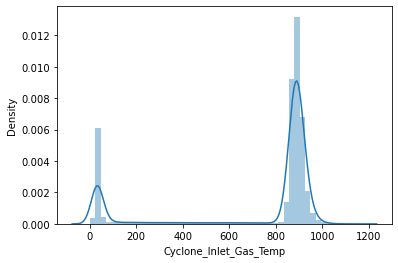

In [10]:
sns.distplot(df['Cyclone_Inlet_Gas_Temp'])

### Plotting displot for each feature 

C:\Users\Rushik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rushik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rushik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='Cyclone_Outlet_Gas_draft', ylabel='Density'>

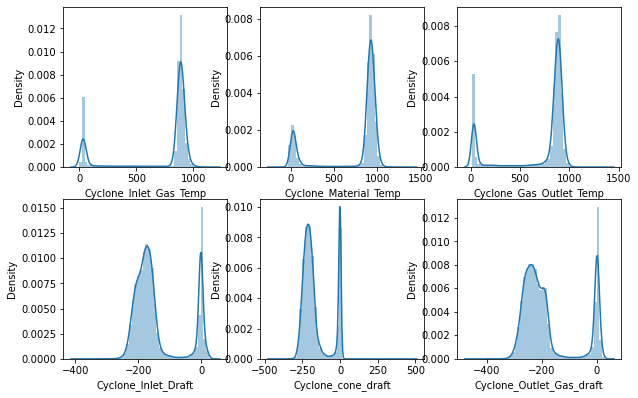

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.distplot(df['Cyclone_Inlet_Gas_Temp'])

plt.subplot(3,3,2)
sns.distplot(df['Cyclone_Material_Temp'])

plt.subplot(3,3,3)
sns.distplot(df['Cyclone_Gas_Outlet_Temp'])

plt.subplot(3,3,4)
sns.distplot(df['Cyclone_Inlet_Draft'])

plt.subplot(3,3,5)
sns.distplot(df['Cyclone_cone_draft'])

plt.subplot(3,3,6)
sns.distplot(df['Cyclone_Outlet_Gas_draft'])

### Plotting boxplot for each feature for visualizingsummary about data like mean as well as outlier

Text(0.5, 1.0, 'Cyclone_Outlet_Gas_draft')

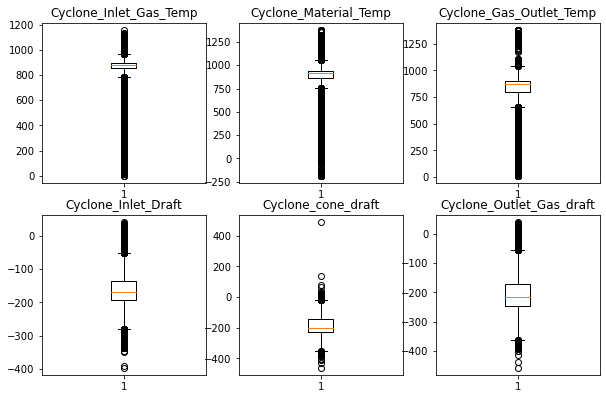

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.boxplot(df['Cyclone_Inlet_Gas_Temp'])
plt.title("Cyclone_Inlet_Gas_Temp")
plt.subplot(3,3,2)
plt.boxplot(df['Cyclone_Material_Temp'])
plt.title("Cyclone_Material_Temp")
plt.subplot(3,3,3)
plt.boxplot(df['Cyclone_Gas_Outlet_Temp'])
plt.title("Cyclone_Gas_Outlet_Temp")
plt.subplot(3,3,4)
plt.boxplot(df['Cyclone_Inlet_Draft'])
plt.title("Cyclone_Inlet_Draft")
plt.subplot(3,3,5)
plt.boxplot(df['Cyclone_cone_draft'])
plt.title("Cyclone_cone_draft")
plt.subplot(3,3,6)
plt.boxplot(df['Cyclone_Outlet_Gas_draft'])
plt.title("Cyclone_Outlet_Gas_draft")

# Anomaly Detection

### Importing PCA for dimensionality reduction

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
df2=df.iloc[:,1:]

In [18]:
names=df2.columns
x = df[names]
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [19]:
scaled_data=scaler.transform(x)

In [20]:
scaled_data.shape

(376124, 6)

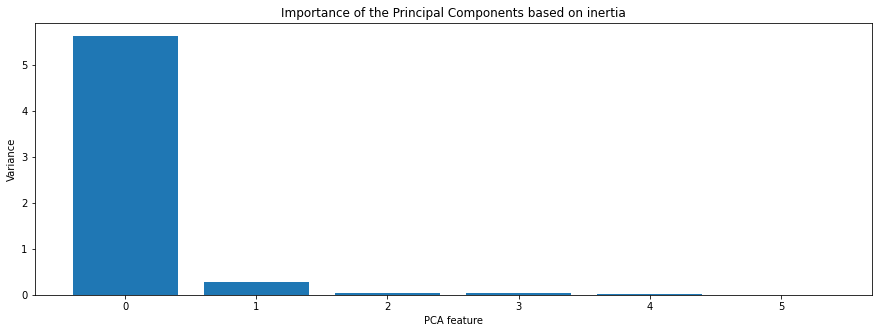

In [21]:
pca=PCA()
pca.fit(scaled_data)
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [22]:
# Taking components equals to 1

In [23]:
pca=PCA(n_components=1)
pca.fit(scaled_data)

PCA(n_components=1)

In [24]:
x_pca=pca.transform(scaled_data)

In [25]:
x_pca.shape
x_pca
pcDf = pd.DataFrame(data = x_pca, columns = ['pc1'])
pcDf

,pc1
0,-0.699684
1,-0.717177
2,-0.615755
3,-0.631301
4,-0.671945
...,...
376119,-1.215923
376120,-1.166896
376121,-1.221505
376122,-1.334090


In [26]:
df_outlier=df

C:\Users\Rushik\AppData\Local\Temp/ipykernel_11900/1306699573.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  _ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Inlet_Gas_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')


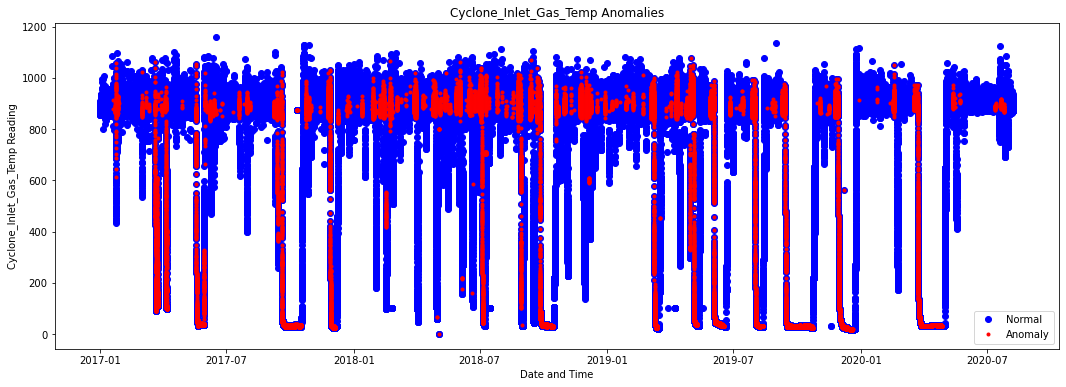

In [27]:
q1_pc1, q3_pc1 =pcDf['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
x_lower_pc1=q1_pc1 - (3*iqr_pc1) #extreme lower bound
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
x_upper_pc1= q3_pc1 + (3*iqr_pc1) #extreme upper bound
# Filter out the outliers from the pc1
df_outlier['anomaly_pc1'] = ((pcDf['pc1']>upper_pc1) | (pcDf['pc1']<lower_pc1)).astype('int')
#anomaly
anomaly = df[df_outlier['anomaly_pc1'] == 1]
#plotting outlier/anomaly with original data
_ = plt.figure(figsize=(18,6))
_ = plt.plot_date(df['time'], df['Cyclone_Inlet_Gas_Temp'], color='blue', label='Normal')
_ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Inlet_Gas_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Cyclone_Inlet_Gas_Temp Reading')
_ = plt.title('Cyclone_Inlet_Gas_Temp Anomalies')
_ = plt.legend(loc=4)
plt.show();

### Taking extreme upper and lower bound. Therefore taking extreme outliers

C:\Users\Rushik\AppData\Local\Temp/ipykernel_11900/2286126079.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  _ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Inlet_Gas_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')


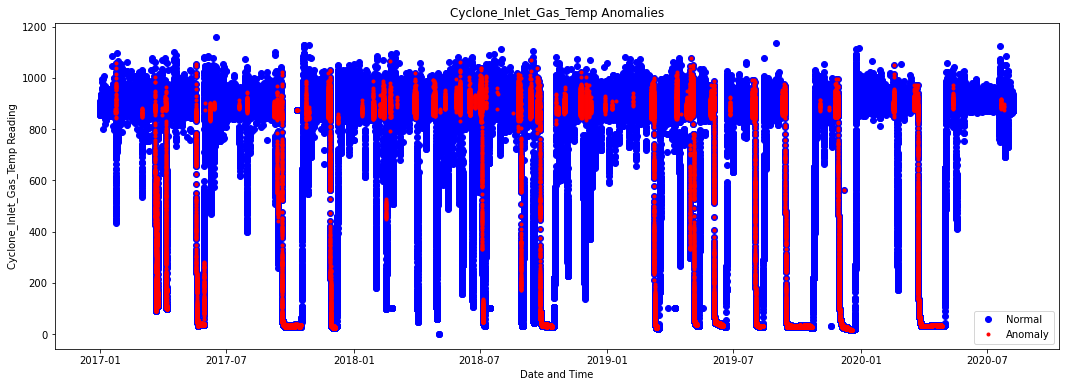

In [28]:
df_outlier['anomaly_pc1'] = ((pcDf['pc1']>x_upper_pc1) | (pcDf['pc1']<x_lower_pc1)).astype('int')
anomaly = df[df_outlier['anomaly_pc1'] == 1]
_ = plt.figure(figsize=(18,6))
_ = plt.plot_date(df['time'], df['Cyclone_Inlet_Gas_Temp'], color='blue', label='Normal')
_ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Inlet_Gas_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Cyclone_Inlet_Gas_Temp Reading')
_ = plt.title('Cyclone_Inlet_Gas_Temp Anomalies')
_ = plt.legend(loc=4)
plt.show();

### Similarly plotting with other features

C:\Users\Rushik\AppData\Local\Temp/ipykernel_11900/4098583283.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  _ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Material_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')


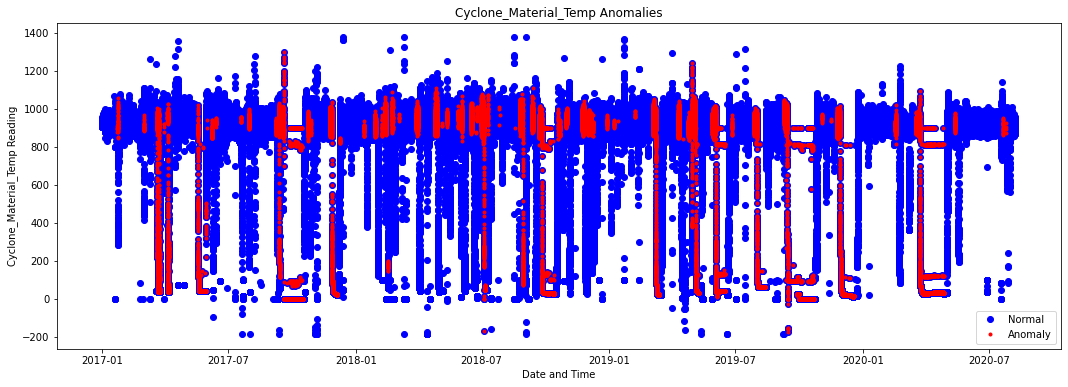

In [29]:
_ = plt.figure(figsize=(18,6))
_ = plt.plot_date(df['time'], df['Cyclone_Material_Temp'], color='blue', label='Normal')
_ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Material_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Cyclone_Material_Temp Reading')
_ = plt.title('Cyclone_Material_Temp Anomalies')
_ = plt.legend(loc=4)
plt.show();

C:\Users\Rushik\AppData\Local\Temp/ipykernel_11900/1161983156.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  _ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Gas_Outlet_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')


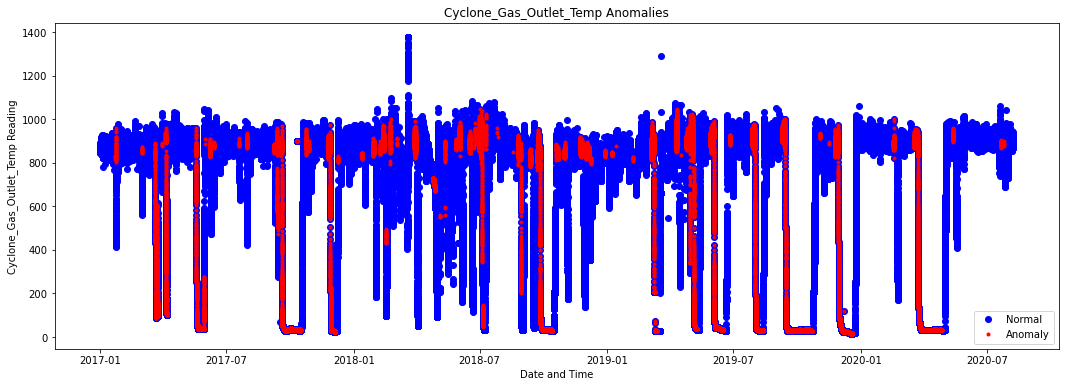

In [30]:
_ = plt.figure(figsize=(18,6))
_ = plt.plot_date(df['time'], df['Cyclone_Gas_Outlet_Temp'], color='blue', label='Normal')
_ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Gas_Outlet_Temp'], linestyle='none', marker='.', color='red',label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Cyclone_Gas_Outlet_Temp Reading')
_ = plt.title('Cyclone_Gas_Outlet_Temp Anomalies')
_ = plt.legend(loc=4)
plt.show();

C:\Users\Rushik\AppData\Local\Temp/ipykernel_11900/2194246591.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  _ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Inlet_Draft'], linestyle='none', marker='.', color='red',label='Anomaly')


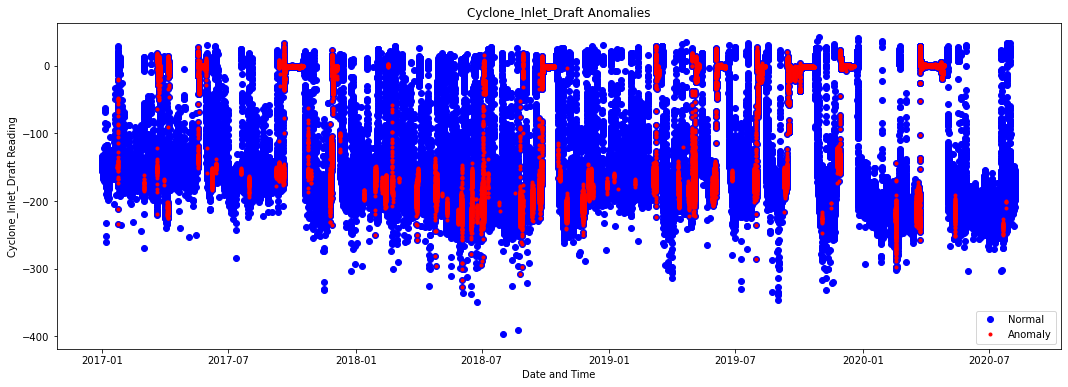

In [31]:
_ = plt.figure(figsize=(18,6))
_ = plt.plot_date(df['time'], df['Cyclone_Inlet_Draft'], color='blue', label='Normal')
_ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Inlet_Draft'], linestyle='none', marker='.', color='red',label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Cyclone_Inlet_Draft Reading')
_ = plt.title('Cyclone_Inlet_Draft Anomalies')
_ = plt.legend(loc=4)
plt.show();

C:\Users\Rushik\AppData\Local\Temp/ipykernel_11900/235791028.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  _ = plt.plot_date(anomaly['time'],anomaly['Cyclone_cone_draft'], linestyle='none', marker='.', color='red',label='Anomaly')


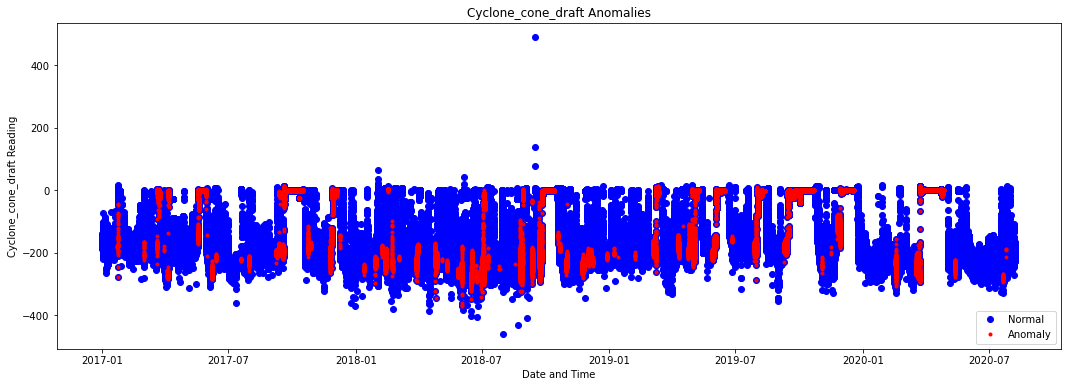

In [32]:
_ = plt.figure(figsize=(18,6))
_ = plt.plot_date(df['time'], df['Cyclone_cone_draft'], color='blue', label='Normal')
_ = plt.plot_date(anomaly['time'],anomaly['Cyclone_cone_draft'], linestyle='none', marker='.', color='red',label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Cyclone_cone_draft Reading')
_ = plt.title('Cyclone_cone_draft Anomalies')
_ = plt.legend(loc=4)
plt.show();

C:\Users\Rushik\AppData\Local\Temp/ipykernel_11900/2009432768.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  _ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Outlet_Gas_draft'], linestyle='none', marker='.', color='red',label='Anomaly')


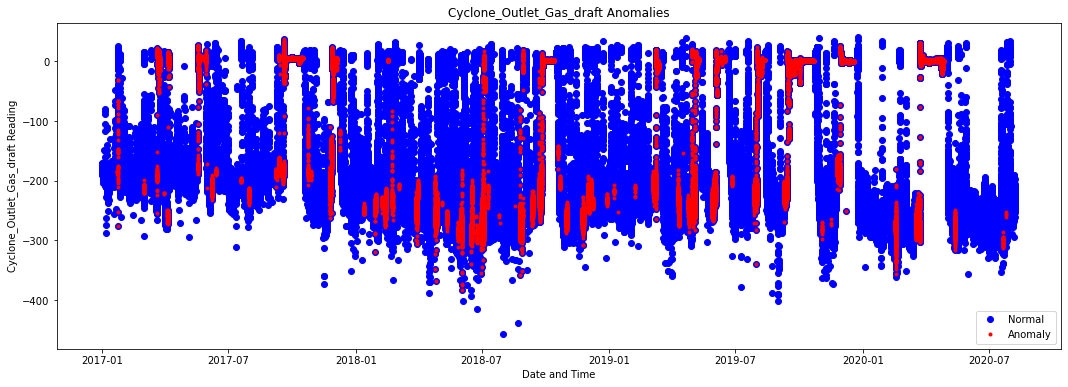

In [33]:
_ = plt.figure(figsize=(18,6))
_ = plt.plot_date(df['time'], df['Cyclone_Outlet_Gas_draft'], color='blue', label='Normal')
_ = plt.plot_date(anomaly['time'],anomaly['Cyclone_Outlet_Gas_draft'], linestyle='none', marker='.', color='red',label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Cyclone_Outlet_Gas_draft Reading')
_ = plt.title('Cyclone_Outlet_Gas_draft Anomalies')
_ = plt.legend(loc=4)
plt.show();